In [10]:
#pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes

In [38]:
# Read in data
data = pd.read_csv('./LimitedData.csv')
data.head(100)

,user_id,order_id,product_id,product_name,department_id,department,aisle_id,aisle
0,1424,1249751,48679,Organic Garnet Sweet Potato (Yam),4,produce,83,fresh vegetables
1,1424,1249751,26209,Limes,4,produce,24,fresh fruits
2,1424,1249751,47209,Organic Hass Avocado,4,produce,24,fresh fruits
3,1424,1249751,5876,Organic Lemon,4,produce,24,fresh fruits
4,1424,1249751,37646,Organic Gala Apples,4,produce,24,fresh fruits
...,...,...,...,...,...,...,...,...
95,1424,2287052,37646,Organic Gala Apples,4,produce,24,fresh fruits
96,1424,2287052,21137,Organic Strawberries,4,produce,24,fresh fruits
97,1424,2287052,22935,Organic Yellow Onion,4,produce,83,fresh vegetables
98,1424,2287052,47209,Organic Hass Avocado,4,produce,24,fresh fruits


In [16]:
filtered_data = data[['user_id','product_id']]
data['user_id'].value_counts()

5588     891
6710     575
3830     485
33731    469
23832    467
13701    432
60694    431
23371    431
43758    370
4694     344
17738    328
52008    318
16274    314
5360     301
4625     301
37592    295
30910    280
9036     277
57546    262
2335     144
Name: user_id, dtype: int64

In [39]:
# Keep a copy of data
data_copy = data.copy()

In [41]:
# Data processing
#from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
data.head(10)

,user_id,order_id,product_id,product_name,department_id,department,aisle_id,aisle
0,0,1364,88,41,2,8,9,10
1,0,1364,37,20,2,8,4,8
2,0,1364,85,45,2,8,4,8
3,0,1364,7,50,2,8,4,8
4,0,1364,64,39,2,8,4,8
5,0,1364,36,40,2,8,9,10
6,0,3324,20,3,2,8,4,8
7,0,3324,55,32,2,8,1,9
8,0,3324,40,49,2,8,9,10
9,0,3324,28,64,2,8,4,8


In [42]:
# Using K-Mode with "Cao" initialization
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 123012.0


In [43]:
# Predicted Clusters
fitClusters_cao

array([1, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [44]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = data.columns

# Mode of the clusters
clusterCentroidsDf

,user_id,order_id,product_id,product_name,department_id,department,aisle_id,aisle
0,37,582,35,4,2,8,4,8
1,45,294,50,33,2,8,9,10


In [45]:
# Using K-Mode with "Huang" initialization
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 423, cost: 122942.0
Run 1, iteration: 2/100, moves: 31, cost: 122942.0


In [46]:
# Predicted clusters
fitClusters_huang

array([1, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [47]:
# Choosing K by comparing Cost against each K
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 129477.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 123012.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7, cost: 116630.0
Run 1, iteration: 2/100, moves: 0, cost: 116630.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10, cost: 114578.0


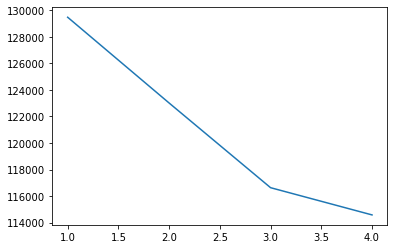

In [48]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [50]:
# Choosing K=2
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7, cost: 116630.0
Run 1, iteration: 2/100, moves: 0, cost: 116630.0


In [51]:
# Combining the predicted clusters with the original DF.
data = data_copy.reset_index()

In [52]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([data, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
combinedDf.head()

,user_id,order_id,product_id,product_name,department_id,department,aisle_id,aisle,cluster_predicted
0,1424,1249751,48679,Organic Garnet Sweet Potato (Yam),4,produce,83,fresh vegetables,1
1,1424,1249751,26209,Limes,4,produce,24,fresh fruits,0
2,1424,1249751,47209,Organic Hass Avocado,4,produce,24,fresh fruits,0
3,1424,1249751,5876,Organic Lemon,4,produce,24,fresh fruits,0
4,1424,1249751,37646,Organic Gala Apples,4,produce,24,fresh fruits,0


In [53]:
# Cluster Identification
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16248 entries, 1 to 22016
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            16248 non-null  int64 
 1   order_id           16248 non-null  int64 
 2   product_id         16248 non-null  int64 
 3   product_name       16248 non-null  object
 4   department_id      16248 non-null  int64 
 5   department         16248 non-null  object
 6   aisle_id           16248 non-null  int64 
 7   aisle              16248 non-null  object
 8   cluster_predicted  16248 non-null  uint16
dtypes: int64(5), object(3), uint16(1)
memory usage: 1.1+ MB


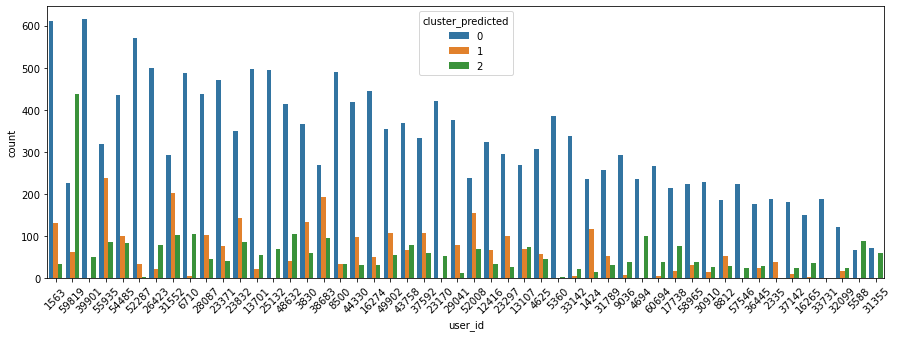

In [55]:
import seaborn as sns

plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['user_id'],order=combinedDf['user_id'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.xticks(rotation = 45)
plt.show()

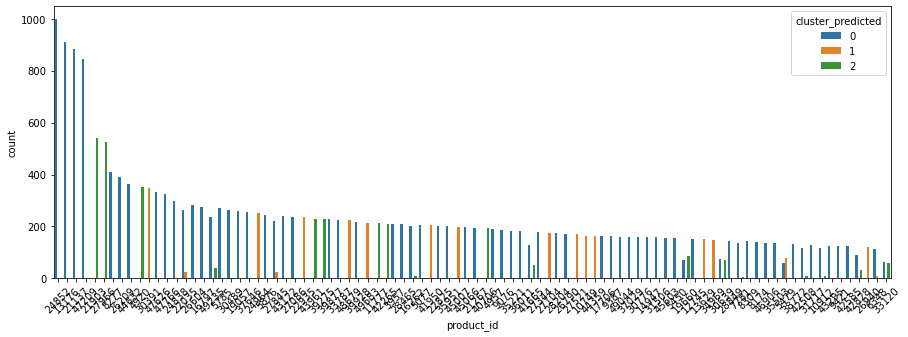

In [56]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['product_id'],order=combinedDf['product_id'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.xticks(rotation = 45)
plt.show()